Thomas Koutsidis

# 1.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spambase.csv')

In [3]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
for i in range(len(df)):
  for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column][i]):
      df[column][i] = pd.to_numeric(df[column][i])
    
# Resources used:
# https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html
# https://www.w3cschool.cn/doc_pandas_0_20/pandas_0_20-generated-pandas-api-types-is_numeric_dtype.html
# https://practicaldatascience.co.uk/data-science/how-to-use-pandas-to-numeric-to-convert-strings-to-numbers#:~:text=Use%20to_numeric()%20to%20convert%20a%20string%20to%20a%20numeric%20value&text=Unlike%20the%20astype()%20method,data%20stored%20in%20the%20column.

In [5]:
# Running a check

for column in df.columns:
  if not pd.api.types.is_numeric_dtype(df[column]):
    print(f"Column {column} is not numeric.")

if all(pd.api.types.is_numeric_dtype(df[column]) for column in df.columns):
  print("All of the columns are numeric.")

# Resources used:
# https://stackoverflow.com/questions/48868998/how-to-use-the-if-all-statement-in-python

All of the columns are numeric.


In [6]:
num_data_points = [200, 500, 1000, 2000]
num_centers = [2, 5, 10, 20]

In [7]:
from sklearn.cluster import KMeans
import time

training = []

for i in num_centers:
  start = time.time()
  model = KMeans(n_clusters = i)
  model.fit(df)
  end = time.time()
  training.append(end - start)

    
# Resources used:
# https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://www.programiz.com/python-programming/examples/elapsed-time

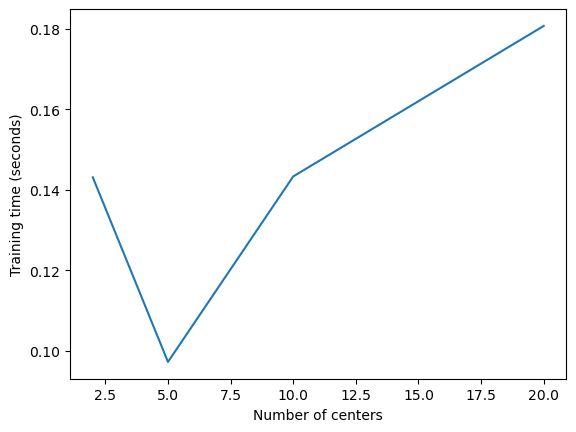

In [8]:
import matplotlib.pyplot as plt

plt.plot(num_centers, training)
plt.xlabel('Number of centers')
plt.ylabel('Training time (seconds)')
plt.show()

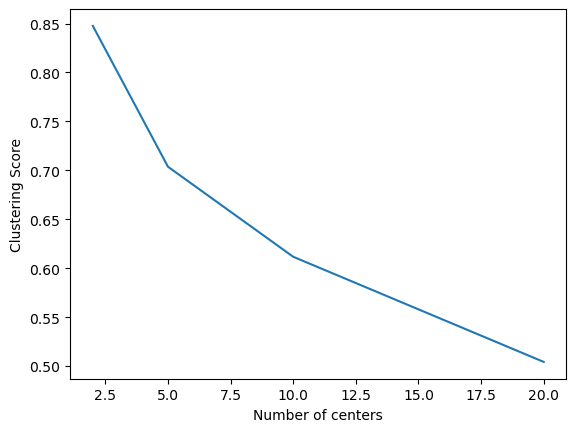

In [9]:
from sklearn.metrics import silhouette_score

cluster_score = []

for i in num_centers:
    model = KMeans(n_clusters = i)
    model.fit(df)
    labels = model.labels_
    score = silhouette_score(df, labels)
    cluster_score.append(score)

plt.plot(num_centers, cluster_score)
plt.xlabel('Number of centers')
plt.ylabel('Clustering Score')
plt.show()

# Resources used:
# https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6#:~:text=The%20score%20is%20defined%20as,Index%2C%20the%20better%20the%20performance.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

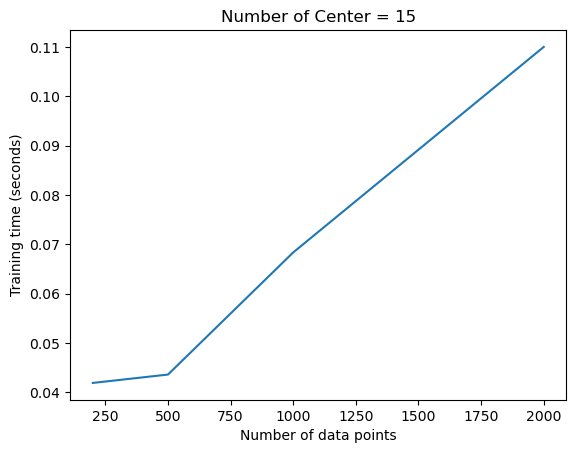

In [10]:
num_center = 15

training = []

for i in num_data_points:
    df_subset = df.sample(n = i)
    start = time.time()
    model = KMeans(n_clusters = num_center)
    model.fit(df_subset)
    end = time.time()
    training.append(end - start)

plt.plot(num_data_points, training)
plt.xlabel('Number of data points')
plt.ylabel('Training time (seconds)')
plt.title('Number of Center = 15')
plt.show()

# 2.

In [11]:
from sklearn import datasets

iris = datasets.load_iris()

# Resources used:
# https://gist.github.com/srishtis/10d8e8cecfa128ff694bd8846f825135

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
X = iris.data
y = iris.target

In [14]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# Resources used:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

In [15]:
chi2_values = chi2(X, y)
f_classif_values = f_classif(X, y)
mutual_info_values = mutual_info_classif(X, y)

In [16]:
import numpy as np

print("Features from most relevant to least (using chi-squared scores):")
print(np.argsort(chi2_values)[::-1][0],'\n')

print("Features from most relevant to least (using F-values):")
print(np.argsort(f_classif_values)[::-1][0],'\n')

print("Features from most relevant to least (using mutual information):")
print(np.argsort(mutual_info_values)[::-1])

# Resources used:
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
# https://www.statology.org/numpy-rank-array/

Features from most relevant to least (using chi-squared scores):
[2 3 0 1] 

Features from most relevant to least (using F-values):
[2 3 0 1] 

Features from most relevant to least (using mutual information):
[3 2 0 1]


In [17]:
from sklearn.feature_selection import VarianceThreshold

model = VarianceThreshold(threshold = 0.1)
var = model.fit_transform(X)

# Resources used:
# https://stackoverflow.com/questions/29298973/removing-features-with-low-variance-using-scikit-learn
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
# https://scikit-learn.org/stable/modules/feature_selection.html

In [18]:
print(var)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
print("Features from most relevant to least (using low variance removal):")
print(np.argsort(var)[::-1][0])

Features from most relevant to least (using low variance removal):
[3 1 2 0]


In [20]:
from sklearn.feature_selection import SelectFpr, SelectFwe

In [21]:
fpr = SelectFpr(alpha = 0.05)

selectfpr = fpr.fit(iris.data, y).transform(iris.data)

# Resources used:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html

In [22]:
print("Features from most relevant to least (using SelectFpr):")
print(np.argsort(selectfpr)[::-1][0])

Features from most relevant to least (using SelectFpr):
[3 1 2 0]


In [23]:
fwe = SelectFwe(alpha = 0.05)

selectfwe = fwe.fit(iris.data, y).transform(iris.data)

# Resources used:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html

In [24]:
print("Features from most relevant to least (using SelectFpr):")
print(np.argsort(selectfwe)[::-1][0])

Features from most relevant to least (using SelectFpr):
[3 1 2 0]


The two methods of SelectFwe and SelectFpr give us feature rankings that differ from using the chi-squared scores, F-values and mutual information. Despite this, their rankings are consistent with the method of low variance removal. 
Fpr, or false positive rate, is the measure of accuracy for a machine learning model in terms of its predictions on positive outcomes. Fwe, or family-wise error rate, describes the overall error rate under a null or no effect across a series of hypothesis tests. 
Resources:
- https://encord.com/glossary/false-positive-rate-definition/#:~:text=False%20positive%20rate%2C%20is%20a,the%20actual%20outcome%20was%20negative.
- https://www.analytics-toolkit.com/glossary/family-wise-error-rate/

# 3.

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

n = 10
d = 2
X = np.random.rand(n,d)
y = np.zeros((n))
y[ X[:,0] < X[:,1] ] = 1
estimator = SVC(kernel='linear')
score = cross_val_score(estimator, X, y).mean()
print(f"Score = {score:.3f}.")

Score = 0.600.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import time

In [27]:
for i in range(1, 11):
    start = time.time()
    regressor = make_pipeline(PolynomialFeatures(i), Ridge())
    score = cross_val_score(regressor, X, y).mean()
    running = time.time() - start
    print(f"Degree value = {i}, Score = {score: .3f}, Running time = {running: .3f}s")
    
# Resources used:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
# https://www.programiz.com/python-programming/examples/elapsed-time
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# https://www.geeksforgeeks.org/make_pipeline-function-in-sklearn/#
# https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm#:~:text=sklearn.,function%20and%20regularization%20is%20L2.

Degree value = 1, Score =  0.121, Running time =  0.017s
Degree value = 2, Score =  0.172, Running time =  0.011s
Degree value = 3, Score =  0.193, Running time =  0.007s
Degree value = 4, Score =  0.201, Running time =  0.009s
Degree value = 5, Score =  0.202, Running time =  0.008s
Degree value = 6, Score =  0.201, Running time =  0.006s
Degree value = 7, Score =  0.198, Running time =  0.006s
Degree value = 8, Score =  0.195, Running time =  0.006s
Degree value = 9, Score =  0.193, Running time =  0.006s
Degree value = 10, Score =  0.190, Running time =  0.006s
